
# Exploratory Data Analysis and Visualization

This notebook explores the cleaned datasets to better understand variable
distributions, relationships, and potential patterns, without performing
any modeling or data transformations.


## Age distribution

This histogram shows the distribution of patient ages across all cohorts.
The goal is to understand the overall age range and central tendency of the population.


the maximal age of a patient is:  100
the minimal age of a patient is:  0


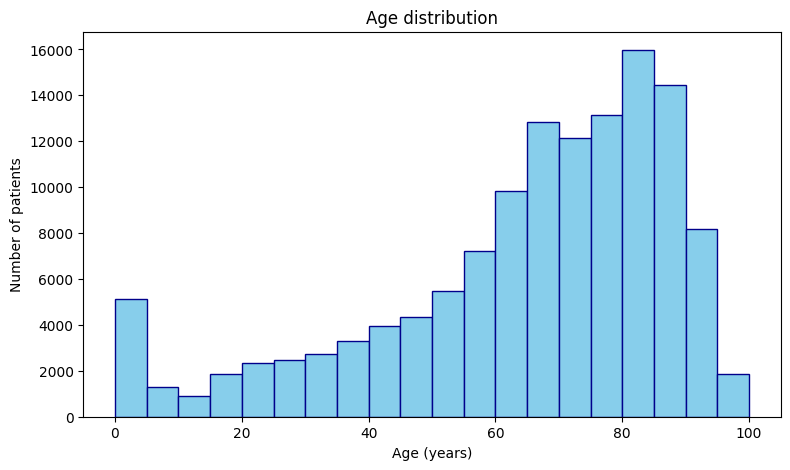

In [1]:
import matplotlib.pyplot as plt
import numpy as num
import pandas as pd
from pathlib import Path

DATA_PATH = Path("../data")

primary = pd.read_csv(DATA_PATH/"primary_cohort.csv")
study = pd.read_csv(DATA_PATH/"study_cohort.csv")
validation = pd.read_csv(DATA_PATH/"validation_cohort.csv")
df = pd.concat([primary, study, validation], ignore_index=True)
df.shape

print("the maximal age of a patient is: ", df["age_years"].max())
print("the minimal age of a patient is: ", df["age_years"].min())

plt.figure(figsize=(9,5))
plt.hist(df['age_years'], bins=20, color='skyblue', edgecolor='darkblue')
plt.title("Age distribution")
plt.xlabel("Age (years)")
plt.ylabel("Number of patients")
plt.show()



## Comparison of survivors vs. non-survivors
This boxplot compares the age distribution between survivors and non-survivors.
It allows a preliminary visual assessment of potential age-related differences
without implying causality.


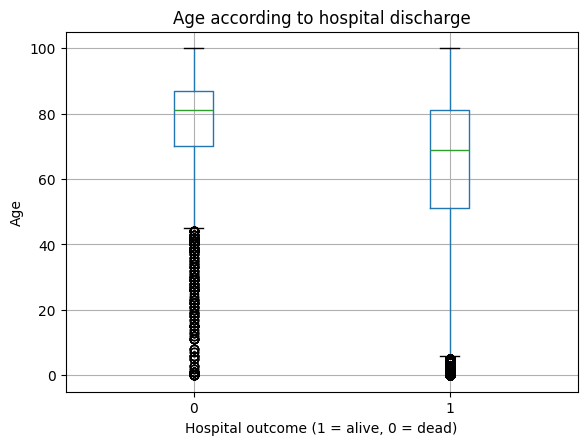

In [2]:
df.boxplot(column='age_years', by='hospital_outcome_1alive_0dead')
plt.title("Age according to hospital discharge")
plt.suptitle("")
plt.xlabel("Hospital outcome (1 = alive, 0 = dead)")
plt.ylabel("Age")
plt.show()


## Distribution of the target variable
This plot highlights the class distribution of the target variable, which is
important for assessing potential class imbalance.


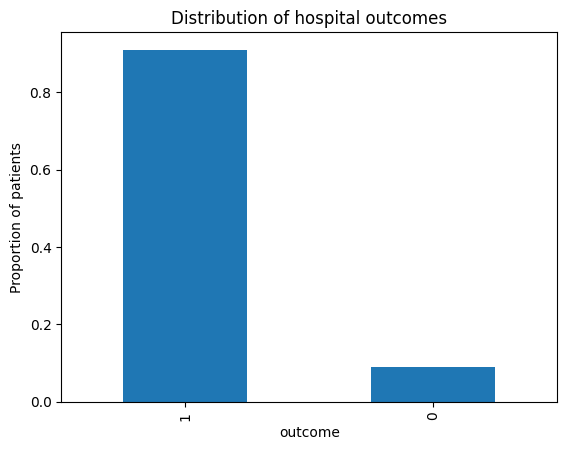

In [3]:
df['hospital_outcome_1alive_0dead'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of hospital outcomes")
plt.xlabel("outcome")
plt.ylabel("Proportion of patients")
plt.show()

## Correlation analysis (exploratory)

The correlation matrix is computed as an exploratory tool to identify potential
linear relationships between numerical variables. Given the presence of binary
and discrete variables, these correlations will be interpreted with caution
and are not used for modeling decisions at this stage.

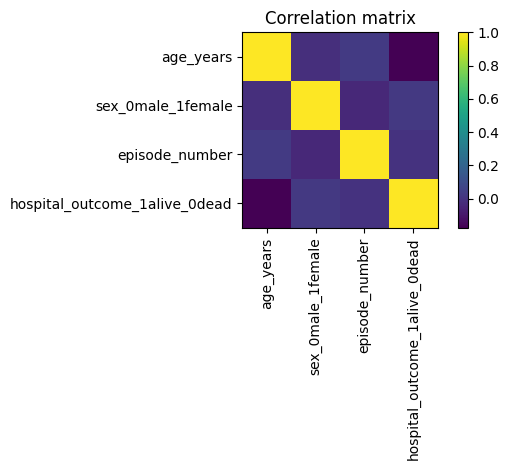

In [4]:


corr = df.corr()

plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


## Targeted scatter plot
No strong linear relationship is observed, suggesting that age alone is not a
dominant factor in episode frequency.

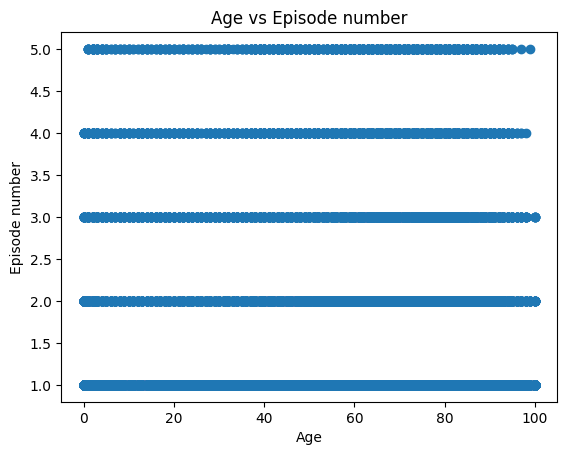

In [5]:
plt.scatter(df['age_years'], df['episode_number'])
plt.xlabel("Age")
plt.ylabel("Episode number")
plt.title("Age vs Episode number")
plt.show()


The initial scatter plot appears unusual due to the discrete nature of the episode_number variable, which only takes five distinct values. This results in a strong overlap of data points along horizontal lines. No clear relationship between patient age and the number of episodes is observed in this visualization, suggesting that age alone does not strongly influence the episode count. To improve interpretability, the scatter plot was enhanced by coloring the points according to hospital outcome, allowing a clearer visual comparison between survivors and non-survivors.

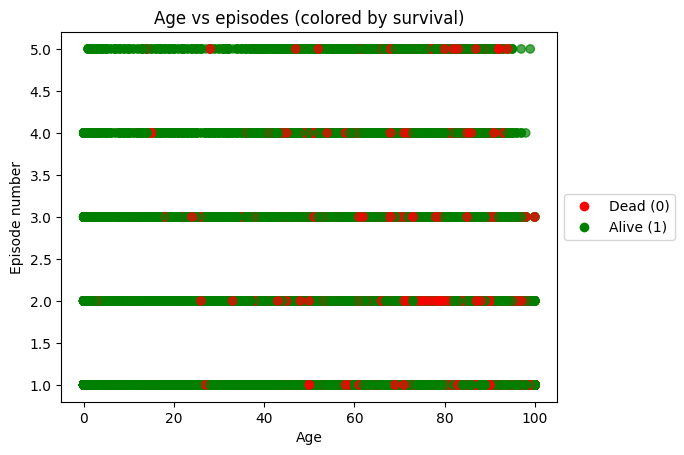

In [6]:

from matplotlib.colors import ListedColormap

cmap = ListedColormap(["red", "green"])

scatter = plt.scatter(
    df['age_years'],
    df['episode_number'],
    c=df['hospital_outcome_1alive_0dead'],
    cmap=cmap,
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Episode number")
plt.title("Age vs episodes (colored by survival)")


handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Dead (0)',
               markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Alive (1)',
               markerfacecolor='green', markersize=8)
]

plt.legend(handles=handles,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.show()


## Bar chart by group
Gender vs survival

Text(0, 0.5, 'Proportion of patients')

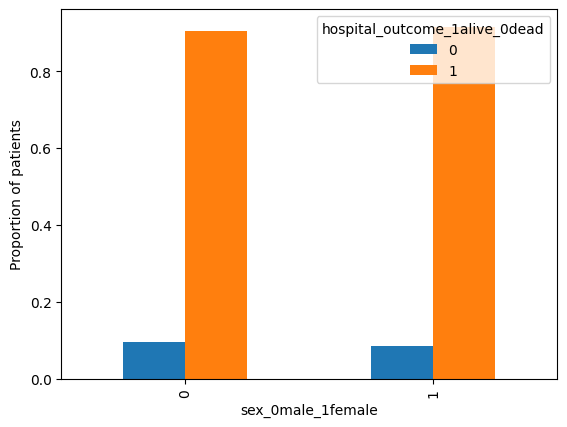

In [7]:
pd.crosstab(
    df['sex_0male_1female'],
    df['hospital_outcome_1alive_0dead'],
    normalize='index'
).plot(kind='bar')
plt.ylabel("Proportion of patients")


## Outliers
This boxplot provides a preliminary visual inspection for potential outliers.
At this stage, no outlier removal is performed; handling of extreme values will
be addressed in later phases if necessary.


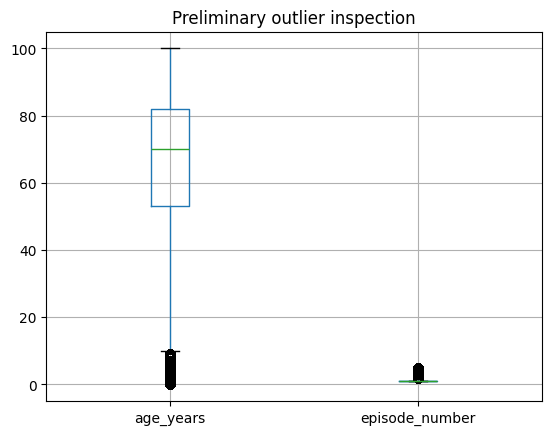

In [8]:
df[['age_years', 'episode_number']].boxplot()
plt.title("Preliminary outlier inspection")
plt.show()